In [1]:
import networkx as nx
import matplotlib.pyplot as plt
plt.xkcd()
import numpy as np
%matplotlib inline

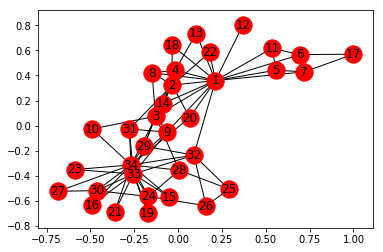

In [2]:
G = nx.read_gml(path='karate.gml',label='id')
nx.draw_networkx(G)

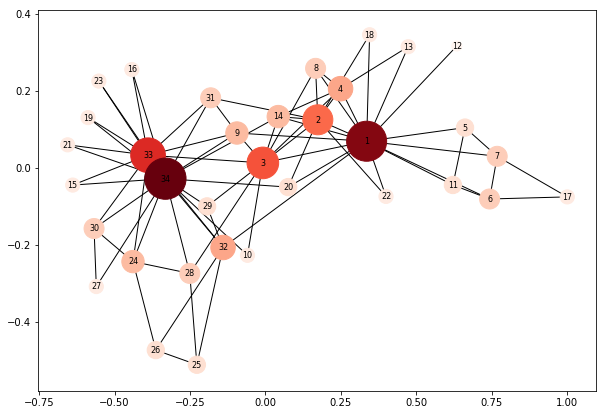

In [42]:
k = G.degree()
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G)
nx.draw_networkx(G, 
                 pos=coord, 
                 node_size=[d*100 for (n,d) in k],
                 node_color=[d for (n,d) in k],
                 font_size=8,
                 cmap=plt.cm.Reds,
                )

Text(0.5,1,"Zachary's club adjacency matrix")

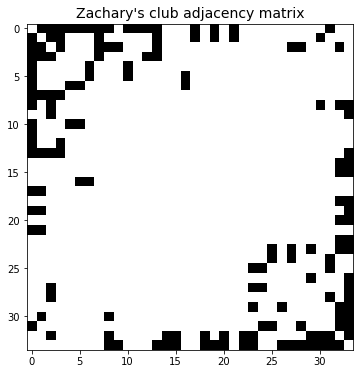

In [47]:
A = nx.to_numpy_matrix(G,dtype=np.bool);A
k = G.degree();k
plt.figure(2, figsize=(6,6))
plt.imshow(A,cmap="Greys",interpolation='none')
plt.title('Zachary\'s club adjacency matrix', fontsize=14)

Text(0.5,0,'Node id')

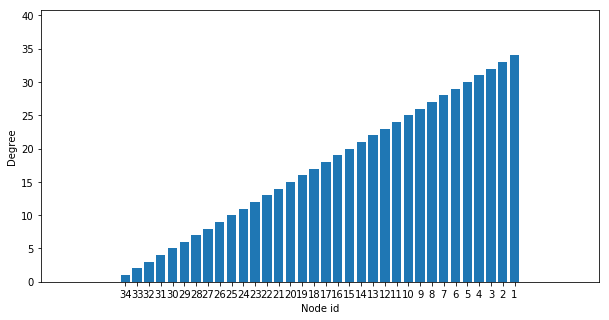

In [62]:
plt.figure(1, figsize=(10, 5))
plt.bar(np.arange(34), G.nodes())
plt.xticks(np.arange(34), sorted(G.nodes(),reverse=True))
plt.margins(0.2)
plt.ylabel('Degree')
plt.xlabel('Node id')

In [63]:
np.random.pareto()

AttributeError: module 'numpy' has no attribute 'pareto'

In [64]:
import numpy.random as rnd

In [68]:
r = rnd.random(10000);
alpha = 3.5
xmin = 1.0
x = (1-r)**(-1.0/(alpha-1)) *xmin
x

array([1.4062181 , 1.50000574, 1.59337961, ..., 1.42285904, 1.38988969,
       1.00749125])

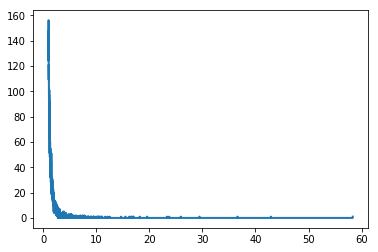

In [75]:
yh, binEdges = np.histogram(x, bins=10000)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,yh,'-',lw=2)

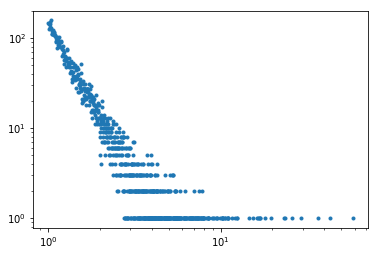

In [76]:
plt.loglog(bincenters,yh, '.',lw=2)

In [80]:
idx = np.ix_(yh!=0)
x_est = np.log(bincenters[idx])
y_est = np.log(yh[idx])


Text(0.5,1,'Estimated $\\alpha$ = -1.9945')

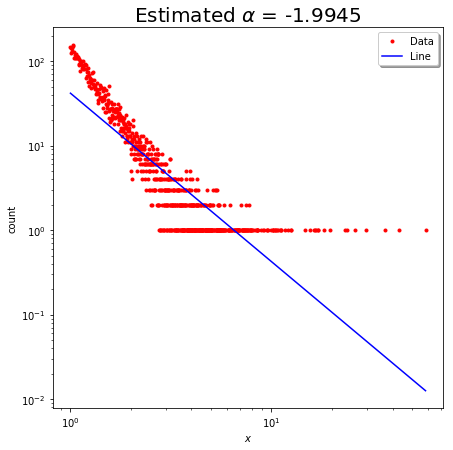

In [83]:
X = np.vstack([np.ones(s), x_est]).T
Beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_est)

# Plot
idx = np.argsort(x_est)
yt = np.exp(X[idx,:].dot(Beta))
xt = np.exp(X[idx,1])

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
ax.loglog(bincenters, yh, '.r', label='Data') 
ax.loglog(xt, yt, 'b', label='Line')
plt.ylabel('count')
plt.xlabel('$x$')
ax.legend(loc='upper right', shadow=True)
plt.title('Estimated $\\alpha$ = {0:1.4f}'.format(Beta[1]), fontsize=20)